# Text classification with an RNN



This short text classification tutorial trains a [recurrent neural network](https://developers.google.com/machine-learning/glossary/#recurrent_neural_network) on the [IMDB large movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/) for sentiment analysis.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-beta1
import tensorflow_datasets as tfds
import tensorflow as tf

     |████████████████████████████████| 348.9MB 118kB/s 
     |████████████████████████████████| 3.1MB 42.0MB/s 
     |████████████████████████████████| 501kB 23.9MB/s 


Import `matplotlib` and create a helper function to plot graphs:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Setup input pipeline


The IMDB large movie review dataset is a *binary classification* dataset—all the reviews have either a *positive* or *negative* sentiment.



In [0]:
### download the dataset using TFDS (https://www.tensorflow.org/datasets). The dataset comes with an inbuilt subword tokenizer. 

dataset, info =tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0822 21:28:04.536525 140532480407424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


W0822 21:30:02.720023 140532480407424 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


As this is a subwords tokenizer, it can be passed any string and the tokenizer will tokenize it.

In [0]:
tokenizer = info.features['text'].encoder
print(tokenizer)

<SubwordTextEncoder vocab_size=8185>


In [0]:
# print the Vocabulary size of the dataset

print ('Vocabulary size: {}'.format(tokenizer.vocab_size))

Vocabulary size: 8185


In [0]:
# test the encoding/decoding format of an example string

example_string = 'ISS is cool.'

tokenized_string = tokenizer.encode(example_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

assert original_string == example_string

Tokenized string is [8002, 3912, 7961, 9, 2724, 7975]
The original string: ISS is cool.


The tokenizer encodes the string by breaking it into subwords if the word is not in its dictionary.

In [0]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

8002 ----> I
3912 ----> SS
7961 ---->  
9 ----> is 
2724 ----> cool
7975 ----> .


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
# batch and suffle the data
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

## Create the model

Build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input—and then to the next.

The tf.keras.layers.Bidirectional wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the output. This helps the RNN to learn long range dependencies.

In [0]:
model = tf.keras.Sequential([
    # embedding layer
    # LSTM(64)
    # dense layer + relu
    # activation functiontf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the Keras model to configure the training process using the binary croppsentropy loss function and the adam optimizer:

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10


W0822 20:13:59.876030 140583801976704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 411s 1s/step - loss: 0.5195 - accuracy: 0.7433 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 223s 569ms/step - loss: 0.3462 - accuracy: 0.8630 - val_loss: 0.4204 - val_accuracy: 0.8413
Epoch 3/10
391/391 [==============================] - 199s 509ms/step - loss: 0.2785 - accuracy: 0.8946 - val_loss: 0.4433 - val_accuracy: 0.8088
Epoch 4/10
391/391 [==============================] - 187s 478ms/step - loss: 0.2340 - accuracy: 0.9130 - val_loss: 0.4396 - val_accuracy: 0.8439
Epoch 5/10
391/391 [==============================] - 183s 467ms/step - loss: 0.1907 - accuracy: 0.9303 - val_loss: 0.4878 - val_accuracy: 0.8351
Epoch 6/10
391/391 [==============================] - 182s 465ms/step - loss: 0.3159 - accuracy: 0.8558 - val_loss: 0.5131 - val_accuracy: 0.7739
Epoch 7/10
391/391 [==============================] - 175s 446ms/step - loss: 0.4317 - accuracy: 0.8032 - val_loss: 0.5403 - val_a

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 49s 125ms/step - loss: 0.3996 - accuracy: 0.8458Test Loss: 0.39964058991435847
Test Accuracy: 0.84579998254776


The above model does not mask the padding applied to the sequences. This can lead to skewness if we train on padded sequences and test on un-padded sequences. Ideally the model would learn to ignore the padding, but as you can see below it does have a small effect on the output.

If the prediction is >= 0.5, it is positive else it is negative.

In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predict(sentence, pad):
  tokenized_sample_pred_text = tokenizer.encode(sample_pred_text)

  if pad:
    tokenized_sample_pred_text = pad_to_size(tokenized_sample_pred_text, 64)

  predictions = model.predict(tf.expand_dims(tokenized_sample_pred_text, 0))

  return (predictions)

In [0]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.7621224]]


In [0]:
# predict on a sample text with padding
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.49941644]]


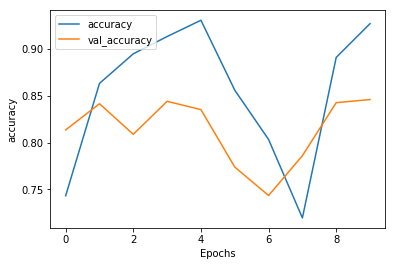

In [0]:
plot_graphs(history, 'accuracy')

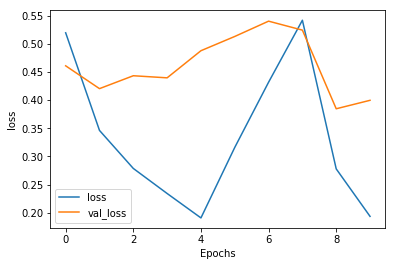

In [0]:
plot_graphs(history, 'loss')

## Stack two or more LSTM layers

Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

* Return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`).
* Return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)).

In [0]:
# redefine the model by stacking two or more LSTM layers

model = tf.keras.Sequential([
    # embedding layer
    # stacked LSTM layers
    # dense layer
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset)

Epoch 1/10


W0822 21:32:35.206001 140532480407424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 699s 2s/step - loss: 0.6628 - accuracy: 0.6057 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 387s 989ms/step - loss: 0.5486 - accuracy: 0.7140 - val_loss: 0.5949 - val_accuracy: 0.7094
Epoch 3/10
391/391 [==============================] - 349s 893ms/step - loss: 0.4543 - accuracy: 0.7982 - val_loss: 0.5900 - val_accuracy: 0.6307
Epoch 4/10
391/391 [==============================] - 339s 867ms/step - loss: 0.4494 - accuracy: 0.7975 - val_loss: 0.4140 - val_accuracy: 0.8197
Epoch 5/10
391/391 [==============================] - 326s 833ms/step - loss: 0.2984 - accuracy: 0.8820 - val_loss: 0.4052 - val_accuracy: 0.8318
Epoch 6/10
391/391 [==============================] - 315s 805ms/step - loss: 0.2333 - accuracy: 0.9114 - val_loss: 0.3444 - val_accuracy: 0.8618
Epoch 7/10
391/391 [==============================] - 318s 813ms/step - loss: 0.2086 - accuracy: 0.9244 - val_loss: 0.3559 - val_a

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 83s 213ms/step - loss: 0.4597 - accuracy: 0.8606Test Loss: 0.459669258855188
Test Accuracy: 0.8605599999427795


In [0]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print (predictions)

[[0.00703323]]


In [0]:
# predict on a sample text with padding
predictions = sample_predict(sample_pred_text, pad=True)
print (predictions)

[[0.00946087]]


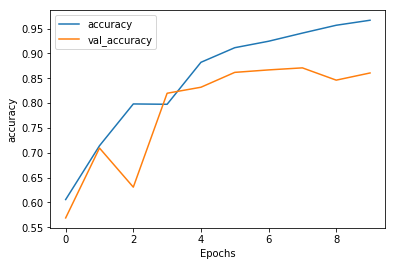

In [0]:
plot_graphs(history, 'accuracy')

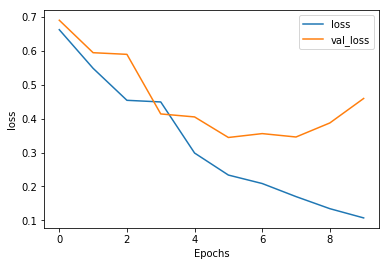

In [0]:
plot_graphs(history, 'loss')